# TASK 2 : LINEAR REGRESSION

### PROBLEM STATEMENT : 


In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.



What will be predicted score if a student study for 9.25 hours in a day ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
df=pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
%matplotlib inline

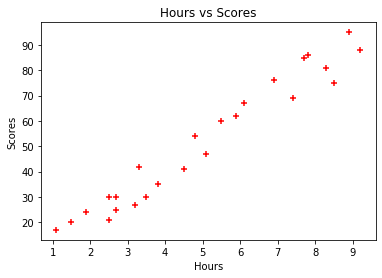

In [7]:
plt.scatter(df.Hours,df.Scores,color='red',marker='+')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

We can observe that as the Hours of study increses,the Scores also increases.Hence there is a linear relationship between the predictor variable and target variable.

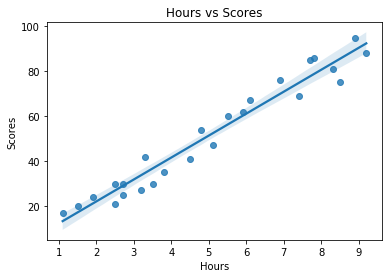

In [8]:
import seaborn as sns
sns.regplot(df.Hours,df.Scores)
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

As the Hours goes up, the Scores goes up: this indicates a positive direct correlation between these two variables. 

#### Correlation

In [9]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['Hours'], df['Scores'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.9761906560220884  with a P-value of P = 9.132624467460325e-17


Since the p-value is < 0.001, the correlation between Hours and Scores is statistically significant, and the linear relationship is quite strong (~0.976, close to 1)

#### Splitting the dataset into train and test data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(df[['Hours']],df['Scores'],test_size=0.3,random_state=0)

In [12]:
len(x_train)

17

In [13]:
len(x_test)

8

Our Model is trained successfully with 70% training data and 30% test data.

#### Model Training & Building

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Model Evaluation

In [16]:
model.score(x_test,y_test)

0.9568211104435257

Our Model is 95.68 % accurate.

#### Model Prediction

In [17]:
predicted_scores=model.predict(x_test)
predicted_scores

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [18]:
actual_scores=y_test
actual_scores

5     20
2     27
19    69
16    30
11    62
22    35
17    24
24    86
Name: Scores, dtype: int64

#### Actual_scores vs Predicted_scores

In [19]:
df = pd.DataFrame({'Actual_scores': actual_scores, 'Predicted_scores':predicted_scores })  
df 

,Actual_scores,Predicted_scores
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


#### What will be predicted score if a student study for 9.25 hours in a day ?

In [20]:
model.predict([[9.25]])

array([92.91505723])

If a student study for 9.25 hours in a day then the predicted score is 92.91